In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
df = pd.read_csv("C:/Users/ADMIN/Downloads/Data/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## Tạo dữ liệu mới

In [14]:
df2 = df[["prefarea","price"]]
df2

,prefarea,price
0,yes,13300000
1,no,12250000
2,yes,12250000
3,yes,12215000
4,no,11410000
...,...,...
540,no,1820000
541,no,1767150
542,no,1750000
543,no,1750000


## Mã hóa dữ liệu

In [15]:
df2 = pd.get_dummies(df2,columns=["prefarea"])
df2 = df2.astype(int)
df2

,price,prefarea_no,prefarea_yes
0,13300000,0,1
1,12250000,1,0
2,12250000,0,1
3,12215000,0,1
4,11410000,1,0
...,...,...,...
540,1820000,1,0
541,1767150,1,0
542,1750000,1,0
543,1750000,1,0


## Kiểm tra dữ liệu trống

In [16]:
df2.isnull().sum()

price           0
prefarea_no     0
prefarea_yes    0
dtype: int64

## Chuẩn hóa dữ liệu

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Chọn các cột cần chuẩn hóa
columns = ["price"]

# Chuẩn hóa dữ liệu và gán lại cho DataFrame
df2[columns] = scaler.fit_transform(df2[columns])

# In DataFrame sau khi chuẩn hóa
df2

,price,prefarea_no,prefarea_yes
0,4.566365,0,1
1,4.004484,1,0
2,4.004484,0,1
3,3.985755,0,1
4,3.554979,1,0
...,...,...,...
540,-1.576868,1,0
541,-1.605149,1,0
542,-1.614327,1,0
543,-1.614327,1,0


## Loại bỏ cột dữ liệu không cần thiết

In [18]:
df2 = df2.drop(columns=["prefarea_no"],axis = 1)
df2

,price,prefarea_yes
0,4.566365,1
1,4.004484,0
2,4.004484,1
3,3.985755,1
4,3.554979,0
...,...,...
540,-1.576868,0
541,-1.605149,0
542,-1.614327,0
543,-1.614327,0


## Xử lí các giá trị Outliers

In [19]:
# Tính toán z-score
z_scores = (df2[columns] - df2[columns].mean()) / df2[columns].std()

# Xác định ngưỡng z-score (ví dụ: ngưỡng = 3)
threshold = 3

# Xác định các giá trị ngoại lệ
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Thay thế giá trị ngoại lệ bằng giá trị trung bình
df2[columns] = np.where(outliers, df2[columns].mean(), df2[columns])

# In DataFrame sau khi thay thế giá trị ngoại lệ bằng giá trị trung bình
df2

,price,prefarea_yes
0,2.085997e-16,1
1,2.085997e-16,0
2,2.085997e-16,1
3,2.085997e-16,1
4,2.085997e-16,0
...,...,...
540,-1.576868e+00,0
541,-1.605149e+00,0
542,-1.614327e+00,0
543,-1.614327e+00,0


## Chia mô hình


In [20]:
price = df2.iloc[:,:-1].values
prefarea =  df2.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(price, prefarea, test_size = 0.2, random_state = 42)


## Tạo mô hình - huấn luyện - dự đoán

In [21]:
# Khởi tạo và huấn luyện mô hình Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0])

## Kiểm tra độ chính xác của mô hình

In [22]:
cm = confusion_matrix(y_test,y_predict)
print(cm)
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.2f}")

[[76  7]
 [23  3]]
Accuracy: 0.72


## Trực quan hóa mô hình

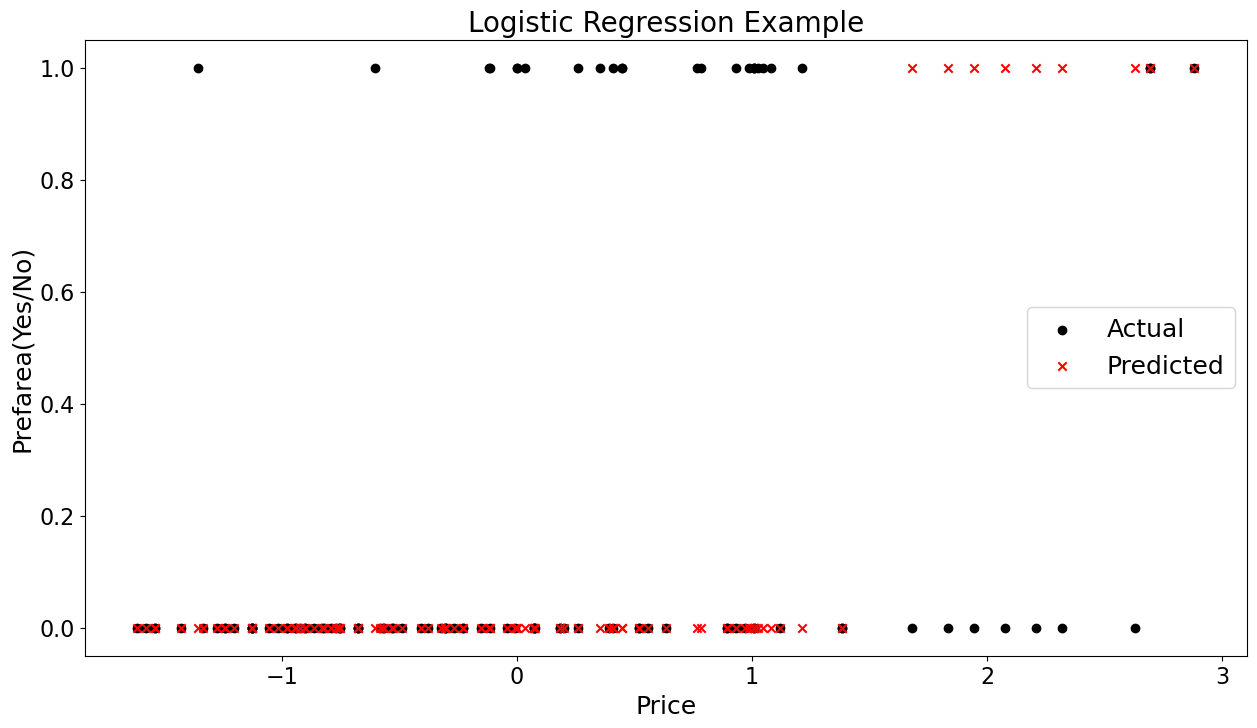

In [23]:
fig,ax = plt.subplots(figsize = (15,8))
ax.scatter(X_test, y_test, color='black', label='Actual')
ax.scatter(X_test, y_predict, color='red', marker='x', label='Predicted')
# chú thích các giá trị cho biểu đồ
ax.set(title = "Logistic Regression Example",
      xlabel = "Price",
      ylabel = "Prefarea(Yes/No)");

ax.title.set_fontsize(20) 
ax.xaxis.label.set_fontsize(18)  
ax.yaxis.label.set_fontsize(18)

ax.tick_params(axis='x', labelsize=16) 
ax.tick_params(axis='y', labelsize=16)  
ax.legend(fontsize=18);